# Project: Wrangling and Analyze Data

## Data Gathering
In the cells below, **all** three pieces of data for this project will be gathered and loaded in the notebook. 

In [528]:
# importing needed libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import twitter_keys as keys
%matplotlib inline

In [ ]:
# Gathering tweet-json.txt from the twitter api.
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = keys.consumer_key
consumer_secret = keys.consumer_secret
access_token = keys.access_token
access_secret = keys.access_secret

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [529]:
#  Downloading the image_predictions.tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [530]:
# Loading of data
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')
arr = [json.loads(i) for i in open("tweet-json.txt")]
twitter_jason_df = pd.DataFrame(arr)

In [531]:
twitter_archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [532]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [533]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [534]:
twitter_archive_df['rating_numerator'].max()

1776

In [535]:
high_low_numerator = twitter_archive_df[(twitter_archive_df['rating_numerator'] == twitter_archive_df['rating_numerator'].max()) | (twitter_archive_df['rating_numerator'] == twitter_archive_df['rating_numerator'].min())]
high_low_numerator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [536]:
for i in high_low_numerator['text'].values:
    print(i)

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


In [537]:
twitter_archive_df[twitter_archive_df['rating_numerator'] > 100]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [538]:
twitter_archive_df[twitter_archive_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [539]:
twitter_archive_df['rating_numerator'].isnull().sum()

0

In [540]:
twitter_archive_df['rating_denominator'].isnull().sum()

0

In [541]:
twitter_jason_df.head(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
5,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,False,False,en,NaN,NaN,NaN,NaN
6,Fri Jul 28 16:27:12 +0000 2017,890971913173991426,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12041,False,False,False,False,en,NaN,NaN,NaN,NaN
7,Fri Jul 28 00:22:40 +0000 2017,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,56848,False,False,False,False,en,NaN,NaN,NaN,NaN
8,Thu Jul 27 16:25:51 +0000 2017,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28226,False,False,False,False,en,NaN,NaN,NaN,NaN
9,Wed Jul 26 15:59:51 +0000 2017,890240255349198849,890240255349198849,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,32467,False,False,False,False,en,NaN,NaN,NaN,NaN


In [542]:
twitter_jason_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [543]:
twitter_jason_df[twitter_jason_df['lang'] != 'en']    

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,NaN
164,Thu May 04 17:01:34 +0000 2017,860177593139703809,860177593139703809,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,in,{'created_at': 'Fri Aug 05 21:19:27 +0000 2016...,NaN,NaN,NaN
289,Sat Mar 04 22:12:52 +0000 2017,838150277551247360,838150277551247360,@markhoppus 182/10,False,"[12, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.381455e+17,...,1824,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN
408,Mon Jan 23 00:56:15 +0000 2017,823333489516937216,823333489516937216,@HistoryInPics 13/10,False,"[15, 20]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.233264e+17,...,777,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN
619,Tue Nov 08 23:01:49 +0000 2016,796125600683540480,796125600683540480,#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,False,"[0, 41]","{'hashtags': [{'text': 'ImWithThor', 'indices'...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5511,False,False,False,False,und,NaN,7.961237e+17,796123679771897856,{'created_at': 'Tue Nov 08 22:54:11 +0000 2016...
868,Fri Aug 05 21:19:27 +0000 2016,761672994376806400,761672994376806400,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 761672828462718981, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,55016,False,False,False,False,in,NaN,NaN,NaN,NaN
980,Sun Jul 03 00:43:15 +0000 2016,749403093750648834,749403093750648834,Duuun dun... duuun dun... dunn dun. dunn dun....,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 749403085643063300, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2892,False,False,False,False,eu,NaN,NaN,NaN,NaN
1078,Sat Jun 04 00:32:32 +0000 2016,738891149612572673,738891149612572673,@mount_alex3 13/10,False,"[13, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.384119e+17,...,115,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN
1343,Tue Mar 01 02:19:31 +0000 2016,704491224099647488,704491224099647488,13/10 hero af\n@ABC,False,"[0, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.044857e+17,...,840,False,False,NaN,NaN,es,NaN,NaN,NaN,NaN
1521,Fri Jan 22 18:49:36 +0000 2016,690607260360429569,690607260360429569,12/10 @LightningHoltt,False,"[0, 21]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.903413e+17,...,313,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN


In [544]:
twitter_jason_df[twitter_jason_df['retweeted_status'].isnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


In [545]:
twitter_jason_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [546]:
image_predictions_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [547]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [548]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [549]:
for i in twitter_archive_df.columns:
    if i in twitter_jason_df.columns:
        print(i)

in_reply_to_status_id
in_reply_to_user_id
source


### ASSESSEMENT
## twitter_archive_df (Quality Issues)

    1. Some ratings were retweeted.
    
    2. Missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns.
    
    3. Supposed null values for rating_numerator and rating_denominator.
        i. Rating text and score for dog at index 1068 is the same with index 784. Both are the same dog. 
        ii. There is actually no rating for dog at index 516. 
        iii. There is actually no rating for dog at index 342.
        
    4. Innacurate rating_denominator values
         i.   rating_denominator for dog at index 313 is 10 not 0. 
         ii.  rating_denominator dog at index 2335 is 10 not 2.
         iii. rating_denominator for dog at index 1165 is 10 not 20.
         iv.  rating_denominator for dog at index 1202 is 10 not 50. 
         v.   rating_denominator for dog at index 1662 is 10 not 11.  
         
    5. Innacurate rating_numerator values
        i.   rating_numerator for dog at index 2335 is 9 not 1.
        ii.  rating_numerator for dog at index 1662 is 10 not 7/11.
        iii. rating_numerator for dog at index 1165 is 13 not 4. 
        iv.  rating_numerator for dog at index 1202 is 11 not 50.
        
    6. Inconsistent rating_denominator values.
    7. Extremely high rating_numerator values which must have been a result of typographical error. 
    8. 'timestamp' column is the same as 'Created_at' column in twitter_jason_df.
    9. tweet_id column name is inconsistent with id column name in twitter_jason_df_clean.
   
    
## twitter_jason_df (Quality Issues)
    1. 'in_reply_to_status_id', 'in_reply_to_user_id', and  'source' columns are repeated in twitter_archive_df.
    2. 'full_text' column is the same with 'text' column in twitter_archive_df.
    3. Null values in 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_id', and 'quoted_status'.
    
    
## twitter_jason_df (Tidiness Issues)
    1. Created_at column should be split into week_day, month, year and hour columns.
    2. Entities column should be a table of its own.
    3. extended entities should be a table of its own.
    
    
## image_predictions_df (Quality issues)
    1. tweet_id column name is inconsistent with id column name in twitter_jason_df_clean.

## twitter_archive_master (Quality issues)
    1. 'id' and 'id_str' columns have the same values but different dtypes.

# Cleaning Data
In this section, all of the issues documented during assessment will be cleaned.

In [550]:
# Making opies of the datasets
twitter_archive_clean = twitter_archive_df.copy()
twitter_jason_df_clean = twitter_jason_df.copy()
image_predictions_df_clean = image_predictions_df.copy()

# Cleaning twitter_archive_clean (Quality Issues)

### Quality Issue #1: Some ratings were retweeted.

#### Define
Remove all retweets.

#### Code

In [551]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [552]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [553]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Quality Issue #2: Missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns.

#### Define
Drop 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns.

#### Code

In [554]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [555]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [556]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Quality Issue #3: Supposed null values for rating_numerator and rating_denominator at index 342, 516 and 1068

#### Define
Drop rows at index 342, 516, and 1068

#### Code

In [557]:
rows_to_drop = [342, 516, 1068]
twitter_archive_clean.drop(rows_to_drop, axis=0, inplace = True)

#### Test

In [558]:
twitter_archive_clean.shape

(2172, 12)

### Quality Issue #4: Innacurate rating_denominator values

#### Define
Replace the rating_denominator values at indexes 313, 784, 1165, 1202, 1662, and 2335 with 10

#### Code

In [559]:
twitter_archive_clean.at[313, 'rating_denominator'] = 10
twitter_archive_clean.at[1165, 'rating_denominator'] = 10
twitter_archive_clean.at[1202, 'rating_denominator'] = 10
twitter_archive_clean.at[1662, 'rating_denominator'] = 10
twitter_archive_clean.at[2335, 'rating_denominator'] = 10

#### Test

In [560]:
assert twitter_archive_clean.at[313, 'rating_denominator'] == 10
assert twitter_archive_clean.at[1165, 'rating_denominator'] == 10
assert twitter_archive_clean.at[1202, 'rating_denominator'] == 10
assert twitter_archive_clean.at[1662, 'rating_denominator'] == 10
assert twitter_archive_clean.at[2335, 'rating_denominator'] == 10

### Quality Issue #5: Innacurate rating_numerator values

#### Define
Replace the rating_numerator values at indexes 784, 1165, 1202, 1662, and 2335 with 14, 13, 11, 10 and 9 respectively.

#### Code

In [561]:
twitter_archive_clean.at[1165, 'rating_numerator'] = 13
twitter_archive_clean.at[1202, 'rating_numerator'] = 11
twitter_archive_clean.at[1662, 'rating_numerator'] = 10
twitter_archive_clean.at[2335, 'rating_numerator'] = 9

#### Test

In [562]:
assert twitter_archive_clean.at[1165, 'rating_numerator'] == 13
assert twitter_archive_clean.at[1202, 'rating_numerator'] == 11
assert twitter_archive_clean.at[1662, 'rating_numerator'] == 10
assert twitter_archive_clean.at[2335, 'rating_numerator'] == 9

# Quality Issue #6: Inconsistent rating_denominator values.

#### Define
Reduce the rating_denominator to 10 by dividing both the rating_numerator and the  rating_denominator by an appropriate number.

#### Code

In [563]:
# dividing both the rating_numerator and the rating_denominator by a number that will reduce the denominator to 10 if the denominator is greater than 10
new_numerator = []
new_denominator = []
for numerator, denominator in zip(twitter_archive_clean['rating_numerator'].values, twitter_archive_clean['rating_denominator'].values):
    divisor = denominator/10
    if denominator > 10:
        new_numerator.append(int(numerator/divisor))
        new_denominator.append(int(denominator/divisor))
    else:
        new_numerator.append(numerator)
        new_denominator.append(denominator)
len(new_numerator)

2172

In [564]:
twitter_archive_clean.shape

(2172, 12)

In [565]:
twitter_archive_clean['rating_numerator']= new_numerator
twitter_archive_clean['rating_denominator'] = new_denominator

#### Test 

In [566]:
for denominator in twitter_archive_clean['rating_denominator'].values:
    if denominator != 10:
        print(denominator)

# Quality Issue #7: Extremely high rating_numerator values which must have been a result of typographical error.

#### Define
Replace rating_numerator that is greater than 100 with the rating_numerator mean value

#### Code

In [567]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 100]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666,10,None,None,None,None,None
290,838150277551247360,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,182,10,None,None,None,None,None
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,10,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [568]:
improper_numerators_index = [188, 189, 290, 313, 979, 2074]
for numerator in improper_numerators_index:
    twitter_archive_clean.at[numerator, 'rating_numerator'] = int(twitter_archive_clean['rating_numerator'].mean())

#### Test

In [569]:
for i in twitter_archive_clean['rating_numerator'].values:
    if i > 100:
        print(i)

# Quality Issue #8: 'timestamp' column is the same as 'Created_at' column in twitter_jason_df.

#### Define
Drop the 'timestamp' column.

#### Code

In [570]:
twitter_archive_clean.drop('timestamp', axis=1, inplace=True)

#### Test

In [571]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2172 non-null   int64 
 1   source              2172 non-null   object
 2   text                2172 non-null   object
 3   expanded_urls       2115 non-null   object
 4   rating_numerator    2172 non-null   int64 
 5   rating_denominator  2172 non-null   int64 
 6   name                2172 non-null   object
 7   doggo               2172 non-null   object
 8   floofer             2172 non-null   object
 9   pupper              2172 non-null   object
 10  puppo               2172 non-null   object
dtypes: int64(3), object(8)
memory usage: 283.6+ KB


In [572]:
twitter_archive_clean.tail()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


# Quality Issue #9: 'tweet_id' column name is inconsistent with id column name in twitter_jason_df_clean.

#### Define
Rename the 'tweet_id' column as 'id.

#### Code

In [573]:
twitter_archive_clean.rename(columns={'tweet_id': 'id'}, inplace=True)

#### Test

In [574]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2172 non-null   int64 
 1   source              2172 non-null   object
 2   text                2172 non-null   object
 3   expanded_urls       2115 non-null   object
 4   rating_numerator    2172 non-null   int64 
 5   rating_denominator  2172 non-null   int64 
 6   name                2172 non-null   object
 7   doggo               2172 non-null   object
 8   floofer             2172 non-null   object
 9   pupper              2172 non-null   object
 10  puppo               2172 non-null   object
dtypes: int64(3), object(8)
memory usage: 283.6+ KB


# Cleaning twitter_jason_df_clean (Quality Issues)

# Quality Issue #1, 2 and 3: 
1. 'in_reply_to_status_id', 'in_reply_to_user_id', and  'source' columns are repeated in twitter_archive_df.
2. 'id' and 'id_str' columns have the same values but different dtypes.
3. 'full_text' column is the same with 'text' column in twitter_archive_df.
4. Null values in 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_id', and 'quoted_status'.

#### Define
Remove 'in_reply_to_status_id', 'in_reply_to_user_id', and 'source' columns.

#### Code

In [575]:
twitter_jason_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'full_text', 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_id','quoted_status'], axis=1, inplace=True)

#### Test

In [576]:
twitter_jason_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2354 non-null   object
 1   id                             2354 non-null   int64 
 2   id_str                         2354 non-null   object
 3   truncated                      2354 non-null   bool  
 4   display_text_range             2354 non-null   object
 5   entities                       2354 non-null   object
 6   extended_entities              2073 non-null   object
 7   in_reply_to_status_id_str      78 non-null     object
 8   in_reply_to_user_id_str        78 non-null     object
 9   in_reply_to_screen_name        78 non-null     object
 10  user                           2354 non-null   object
 11  is_quote_status                2354 non-null   bool  
 12  retweet_count                  2354 non-null   int64 
 13  fav

# Cleaning twitter_jason_df_clean (Tidiness Issues)

## Tidiness Issues #1

#### Define
Created_at column in twitter_jason_df should be split into hour, week_day, month, year and time columns.

#### Code

In [577]:
twitter_jason_df_clean

,created_at,id,id_str,truncated,display_text_range,entities,extended_entities,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id_str
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",None,None,None,...,False,8853,39467,False,False,False,False,en,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",None,None,None,...,False,6514,33819,False,False,False,False,en,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",None,None,None,...,False,4328,25461,False,False,False,False,en,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",None,None,None,...,False,8964,42908,False,False,False,False,en,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",None,None,None,...,False,9774,41048,False,False,False,False,en,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",None,None,None,...,False,41,111,False,False,False,False,en,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",None,None,None,...,False,147,311,False,False,False,False,en,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",None,None,None,...,False,47,128,False,False,False,False,en,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",None,None,None,...,False,48,132,False,False,False,False,en,NaN,NaN


In [578]:
date_df = twitter_jason_df_clean['created_at'].str.split(" ", expand=True)
date_df.columns = ['week_day', 'month', 'day', 'time', '0000', 'year']
hour_in_the_day = [time.split(':')[0] for time in date_df['time'].values]
date_df['hour_in_the_day'] = hour_in_the_day
date_df.drop(['day', 'time', '0000'], axis=1, inplace=True)
twitter_jason_df_clean = pd.concat([date_df, twitter_jason_df_clean], axis=1)
twitter_jason_df_clean.drop('created_at', axis=1, inplace=True)

#### Test

In [579]:
twitter_jason_df_clean.head()

,week_day,month,year,hour_in_the_day,id,id_str,truncated,display_text_range,entities,extended_entities,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id_str
0,Tue,Aug,2017,16,892420643555336193,892420643555336193,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",...,False,8853,39467,False,False,False,False,en,NaN,NaN
1,Tue,Aug,2017,00,892177421306343426,892177421306343426,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",...,False,6514,33819,False,False,False,False,en,NaN,NaN
2,Mon,Jul,2017,00,891815181378084864,891815181378084864,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",...,False,4328,25461,False,False,False,False,en,NaN,NaN
3,Sun,Jul,2017,15,891689557279858688,891689557279858688,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",...,False,8964,42908,False,False,False,False,en,NaN,NaN
4,Sat,Jul,2017,16,891327558926688256,891327558926688256,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",...,False,9774,41048,False,False,False,False,en,NaN,NaN


## Tidiness Issues #2

#### Define
'entities' column should be a table of its own.

#### Code

In [580]:
entities_table = list(twitter_jason_df_clean['entities'])
entities_df = pd.DataFrame(entities_table)

#### Test

In [581]:
entities_df.head()

,hashtags,symbols,user_mentions,urls,media
0,[],[],[],[],"[{'id': 892420639486877696, 'id_str': '8924206..."
1,[],[],[],[],"[{'id': 892177413194625024, 'id_str': '8921774..."
2,[],[],[],[],"[{'id': 891815175371796480, 'id_str': '8918151..."
3,[],[],[],[],"[{'id': 891689552724799489, 'id_str': '8916895..."
4,"[{'text': 'BarkWeek', 'indices': [129, 138]}]",[],[],[],"[{'id': 891327551943041024, 'id_str': '8913275..."


## Tidiness Issues #3

#### Define
'extended_entities' column should be a table of its own.

#### Code

In [582]:
twitter_jason_df_clean['extended_entities'].isna().sum()
# 281 null values in the 'extended_entities' column.

281

In [583]:
twitter_jason_df_clean['extended_entities'].values

array([{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},
       {'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343

In [584]:
# treating the null values in the extended_entities column
missing_values = {'media': [{'id': 000000000000000000, 'id_str': '000000000000000000', 'indices': [00, 000], 
                'media_url': 'missing_value', 'media_url_https': 'missing_value',
             
                             'url': 'missing_value', 'display_url': 'missing_value', 
                'expanded_url': 'missing_value', 'type': 'missing_value', 
                'sizes': {'large': {'w': 000, 'h': 000, 'resize': 'missing_value'}, 'thumb': {'w': 000, 'h': 000, 'resize': 'missing_value'}, 
                'small': {'w': 000, 'h': 000, 'resize': 'missing_value'}, 'medium': {'w': 000, 'h': 000, 'resize': 'missing_value'}}}]}

whole_list = []
extended_entities_list = twitter_jason_df_clean['extended_entities'].values
for i in extended_entities_list:
    if type(i) == float:
        whole_list.append(missing_values)
    else:
        whole_list.append(i)
for a in whole_list:
    assert type(a) == dict

In [585]:
extended_entities_new_list = []
for item in whole_list:
    for value in item['media']:
        extended_entities_new_list.append(value)
extended_entities_df = pd.DataFrame(extended_entities_new_list)

#### Test

In [586]:
extended_entities_df.head()

,id,id_str,indices,media_url,media_url_https,url,display_url,expanded_url,type,sizes,video_info,additional_media_info,source_status_id,source_status_id_str,source_user_id,source_user_id_str
0,892420639486877696,892420639486877696,"[86, 109]",http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://t.co/MgUWQ76dJU,pic.twitter.com/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643...,photo,"{'large': {'w': 540, 'h': 528, 'resize': 'fit'...",NaN,NaN,NaN,NaN,NaN,NaN
1,892177413194625024,892177413194625024,"[139, 162]",http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://t.co/0Xxu71qeIV,pic.twitter.com/0Xxu71qeIV,https://twitter.com/dog_rates/status/892177421...,photo,"{'large': {'w': 1407, 'h': 1600, 'resize': 'fi...",NaN,NaN,NaN,NaN,NaN,NaN
2,891815175371796480,891815175371796480,"[122, 145]",http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://t.co/wUnZnhtVJB,pic.twitter.com/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181...,photo,"{'medium': {'w': 901, 'h': 1200, 'resize': 'fi...",NaN,NaN,NaN,NaN,NaN,NaN
3,891689552724799489,891689552724799489,"[80, 103]",http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://t.co/tD36da7qLQ,pic.twitter.com/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557...,photo,"{'medium': {'w': 901, 'h': 1200, 'resize': 'fi...",NaN,NaN,NaN,NaN,NaN,NaN
4,891327551943041024,891327551943041024,"[139, 162]",http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://t.co/AtUZn91f7f,pic.twitter.com/AtUZn91f7f,https://twitter.com/dog_rates/status/891327558...,photo,"{'small': {'w': 680, 'h': 510, 'resize': 'fit'...",NaN,NaN,NaN,NaN,NaN,NaN


##### The 'sizes' column should be a table of its own.

In [587]:
extended_entities_sizes = list(extended_entities_df['sizes'])
extended_entities_sizes_df = pd.DataFrame(extended_entities_sizes)
extended_entities_sizes_df

,large,thumb,small,medium
0,"{'w': 540, 'h': 528, 'resize': 'fit'}","{'w': 150, 'h': 150, 'resize': 'crop'}","{'w': 540, 'h': 528, 'resize': 'fit'}","{'w': 540, 'h': 528, 'resize': 'fit'}"
1,"{'w': 1407, 'h': 1600, 'resize': 'fit'}","{'w': 150, 'h': 150, 'resize': 'crop'}","{'w': 598, 'h': 680, 'resize': 'fit'}","{'w': 1055, 'h': 1200, 'resize': 'fit'}"
2,"{'w': 1201, 'h': 1600, 'resize': 'fit'}","{'w': 150, 'h': 150, 'resize': 'crop'}","{'w': 510, 'h': 680, 'resize': 'fit'}","{'w': 901, 'h': 1200, 'resize': 'fit'}"
3,"{'w': 1201, 'h': 1600, 'resize': 'fit'}","{'w': 150, 'h': 150, 'resize': 'crop'}","{'w': 510, 'h': 680, 'resize': 'fit'}","{'w': 901, 'h': 1200, 'resize': 'fit'}"
4,"{'w': 720, 'h': 540, 'resize': 'fit'}","{'w': 150, 'h': 150, 'resize': 'crop'}","{'w': 680, 'h': 510, 'resize': 'fit'}","{'w': 720, 'h': 540, 'resize': 'fit'}"
...,...,...,...,...
3221,"{'w': 768, 'h': 1024, 'resize': 'fit'}","{'w': 150, 'h': 150, 'resize': 'crop'}","{'w': 340, 'h': 453, 'resize': 'fit'}","{'w': 600, 'h': 800, 'resize': 'fit'}"
3222,"{'w': 768, 'h': 1024, 'resize': 'fit'}","{'w': 150, 'h': 150, 'resize': 'crop'}","{'w': 340, 'h': 453, 'resize': 'fit'}","{'w': 600, 'h': 800, 'resize': 'fit'}"
3223,"{'w': 1024, 'h': 682, 'resize': 'fit'}","{'w': 150, 'h': 150, 'resize': 'crop'}","{'w': 340, 'h': 226, 'resize': 'fit'}","{'w': 600, 'h': 400, 'resize': 'fit'}"
3224,"{'w': 768, 'h': 1024, 'resize': 'fit'}","{'w': 150, 'h': 150, 'resize': 'crop'}","{'w': 340, 'h': 453, 'resize': 'fit'}","{'w': 600, 'h': 800, 'resize': 'fit'}"


##### Let's split the columns in extended_entities_sizes_df.

In [588]:
# defining a function
def split_size_df(df, column_in_quotes):
    sizes_list = list(df[column_in_quotes])
    split_df = pd.DataFrame(sizes_list)
    split_df.columns = [column_in_quotes + '_width', column_in_quotes + '_height', column_in_quotes + '_resize']
    drop_df = df.drop([column_in_quotes], axis=1)
    new_df = pd.concat([drop_df, split_df], axis=1)
    return new_df

In [589]:
large = split_size_df(extended_entities_sizes_df, 'large')
thumb = split_size_df(large, 'thumb')
small = split_size_df(thumb, 'small')
extended_entities_sizes_df = split_size_df(small, 'medium')
extended_entities_sizes_df

,large_width,large_height,large_resize,thumb_width,thumb_height,thumb_resize,small_width,small_height,small_resize,medium_width,medium_height,medium_resize
0,540,528,fit,150,150,crop,540,528,fit,540,528,fit
1,1407,1600,fit,150,150,crop,598,680,fit,1055,1200,fit
2,1201,1600,fit,150,150,crop,510,680,fit,901,1200,fit
3,1201,1600,fit,150,150,crop,510,680,fit,901,1200,fit
4,720,540,fit,150,150,crop,680,510,fit,720,540,fit
...,...,...,...,...,...,...,...,...,...,...,...,...
3221,768,1024,fit,150,150,crop,340,453,fit,600,800,fit
3222,768,1024,fit,150,150,crop,340,453,fit,600,800,fit
3223,1024,682,fit,150,150,crop,340,226,fit,600,400,fit
3224,768,1024,fit,150,150,crop,340,453,fit,600,800,fit


In [590]:
extended_entities_sizes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   large_width    3226 non-null   int64 
 1   large_height   3226 non-null   int64 
 2   large_resize   3226 non-null   object
 3   thumb_width    3226 non-null   int64 
 4   thumb_height   3226 non-null   int64 
 5   thumb_resize   3226 non-null   object
 6   small_width    3226 non-null   int64 
 7   small_height   3226 non-null   int64 
 8   small_resize   3226 non-null   object
 9   medium_width   3226 non-null   int64 
 10  medium_height  3226 non-null   int64 
 11  medium_resize  3226 non-null   object
dtypes: int64(8), object(4)
memory usage: 302.6+ KB


##### The 'entities' and 'extended_entities' columns and all the subtables are not needed in this analysis

In [591]:
twitter_jason_df_clean.head()

,week_day,month,year,hour_in_the_day,id,id_str,truncated,display_text_range,entities,extended_entities,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id_str
0,Tue,Aug,2017,16,892420643555336193,892420643555336193,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",...,False,8853,39467,False,False,False,False,en,NaN,NaN
1,Tue,Aug,2017,00,892177421306343426,892177421306343426,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",...,False,6514,33819,False,False,False,False,en,NaN,NaN
2,Mon,Jul,2017,00,891815181378084864,891815181378084864,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",...,False,4328,25461,False,False,False,False,en,NaN,NaN
3,Sun,Jul,2017,15,891689557279858688,891689557279858688,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",...,False,8964,42908,False,False,False,False,en,NaN,NaN
4,Sat,Jul,2017,16,891327558926688256,891327558926688256,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",...,False,9774,41048,False,False,False,False,en,NaN,NaN


##### Let's take only the columns we need for the analysis

In [592]:
needed_twitter_jason_dfcolumns = ['id', 'id_str', 'hour_in_the_day', 'week_day', 'month', 'year', 'retweet_count', 'favorite_count']
twitter_jason_df_clean = twitter_jason_df_clean[needed_twitter_jason_dfcolumns]
twitter_jason_df_clean

,id,id_str,hour_in_the_day,week_day,month,year,retweet_count,favorite_count
0,892420643555336193,892420643555336193,16,Tue,Aug,2017,8853,39467
1,892177421306343426,892177421306343426,00,Tue,Aug,2017,6514,33819
2,891815181378084864,891815181378084864,00,Mon,Jul,2017,4328,25461
3,891689557279858688,891689557279858688,15,Sun,Jul,2017,8964,42908
4,891327558926688256,891327558926688256,16,Sat,Jul,2017,9774,41048
...,...,...,...,...,...,...,...,...
2349,666049248165822465,666049248165822465,00,Mon,Nov,2015,41,111
2350,666044226329800704,666044226329800704,00,Mon,Nov,2015,147,311
2351,666033412701032449,666033412701032449,23,Sun,Nov,2015,47,128
2352,666029285002620928,666029285002620928,23,Sun,Nov,2015,48,132


# Cleaning the image_predictions_df (Quality issues)

## Quality Issue #1

#### Define
'tweet_id' column should be renamed as 'id'.

#### Code

In [593]:
image_predictions_df_clean.rename(columns={'tweet_id': 'id'}, inplace=True)

#### Test

In [594]:
image_predictions_df_clean.head()

,id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Let's create a master dataframe

In [599]:
new_df = pd.merge(twitter_jason_df_clean, twitter_archive_clean)
twitter_archive_master = pd.merge(new_df, image_predictions_df_clean)
twitter_archive_master.head()

,id,id_str,hour_in_the_day,week_day,month,year,retweet_count,favorite_count,source,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,892420643555336193,16,Tue,Aug,2017,8853,39467,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,892177421306343426,00,Tue,Aug,2017,6514,33819,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,891815181378084864,00,Mon,Jul,2017,4328,25461,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,891689557279858688,15,Sun,Jul,2017,8964,42908,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,891327558926688256,16,Sat,Jul,2017,9774,41048,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [600]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1992 non-null   int64  
 1   id_str              1992 non-null   object 
 2   hour_in_the_day     1992 non-null   object 
 3   week_day            1992 non-null   object 
 4   month               1992 non-null   object 
 5   year                1992 non-null   object 
 6   retweet_count       1992 non-null   int64  
 7   favorite_count      1992 non-null   int64  
 8   source              1992 non-null   object 
 9   text                1992 non-null   object 
 10  expanded_urls       1992 non-null   object 
 11  rating_numerator    1992 non-null   int64  
 12  rating_denominator  1992 non-null   int64  
 13  name                1992 non-null   object 
 14  doggo               1992 non-null   object 
 15  floofer             1992 non-null   object 
 16  pupper

# Cleaning twitter_archive_master Quality Issue #1
'id' and 'id_str' columns have the same values but different dtypes.

#### Define
Drop the 'id' column because it has a wrong dtype. Retain the 'id_str' column and rename it as 'id'.

#### Code

In [604]:
# Dropping the 'id' column
twitter_archive_master.drop('id', axis=1, inplace=True)

In [606]:
# renaming the 'id_str' column as 'id'.
twitter_archive_master.rename(columns={'id_str': 'id'}, inplace=True)

#### Test

In [608]:
twitter_archive_master.head(2)

,id,hour_in_the_day,week_day,month,year,retweet_count,favorite_count,source,text,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,16,Tue,Aug,2017,8853,39467,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,00,Tue,Aug,2017,6514,33819,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [609]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1992 non-null   object 
 1   hour_in_the_day     1992 non-null   object 
 2   week_day            1992 non-null   object 
 3   month               1992 non-null   object 
 4   year                1992 non-null   object 
 5   retweet_count       1992 non-null   int64  
 6   favorite_count      1992 non-null   int64  
 7   source              1992 non-null   object 
 8   text                1992 non-null   object 
 9   expanded_urls       1992 non-null   object 
 10  rating_numerator    1992 non-null   int64  
 11  rating_denominator  1992 non-null   int64  
 12  name                1992 non-null   object 
 13  doggo               1992 non-null   object 
 14  floofer             1992 non-null   object 
 15  pupper              1992 non-null   object 
 16  puppo 

In [610]:
twitter_archive_master.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1992.000000,1992.000000,1992.000000,1992.0,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,2764.071787,8891.316265,10.600904,10.0,1.202309,0.593694,1.344851e-01,6.028406e-02
std,4674.742009,12216.304999,2.660019,0.0,0.559593,0.271977,1.007047e-01,5.090381e-02
min,16.000000,81.000000,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,623.750000,1978.500000,10.000000,10.0,1.000000,0.362775,5.401683e-02,1.616933e-02
50%,1354.500000,4130.500000,11.000000,10.0,1.000000,0.587440,1.175370e-01,4.952715e-02
75%,3220.000000,11304.000000,12.000000,10.0,1.000000,0.845599,1.952647e-01,9.162278e-02
max,79515.000000,132810.000000,75.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01


## Storing Data
The gathered, assessed, and cleaned master dataset will be saved to a CSV file named "twitter_archive_master.csv".

In [611]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

In [612]:
# checking whether the twitter_archive_master.csv is in the present working directory
os.listdir()

['.ipynb_checkpoints',
 'act_report.pdf',
 'image_predictions.tsv',
 'new.ipynb',
 'tweet-json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'wragle_report.pdf',
 'wrangle_act.ipynb',
 'wrangle_new.ipynb']

# Eploratory Data Analysis

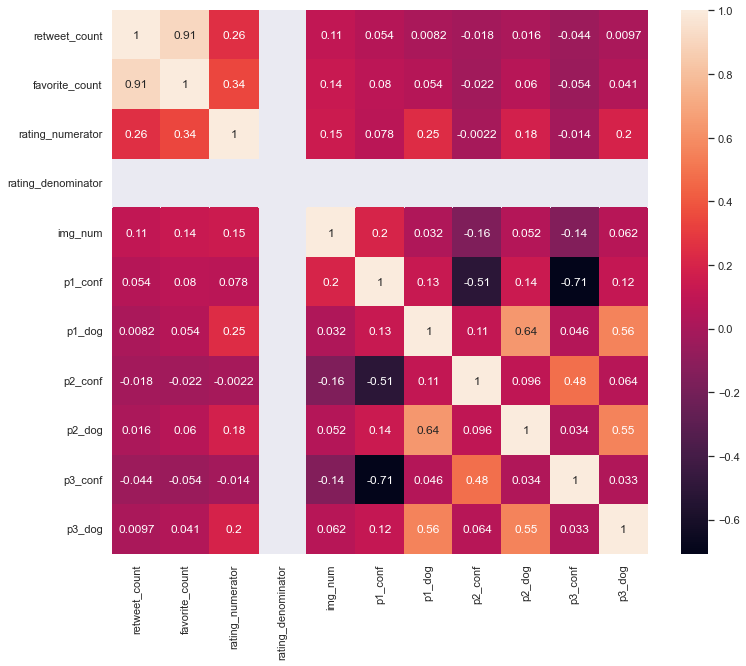

In [614]:
correlation_matrix = twitter_archive_master.corr()
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(correlation_matrix, annot=True)
plt.show()

The following can be deduced from the correlation matrix: <br>
<ul>
<li>favorite_count and retweet_count columns have a positive correlation of 0.91 which is a very significant figure to consider. This shows that there exists a positive correlation between people's like of a rating and their tendency of retweeting the rating. In other words, people are most likely to retweet a rating that they like. <br>
<li>With a correlation of 0.34, one can say that there is very low correlation between rating score (rating_numerator column) and people's like of a rating (favorite_count). However, it appears that people tend to like tweets with high rating score. <br>
<li>With a correlation of 0.26, one can say that there is very low positive correlation between rating score (rating_numerator column) and people's tendency of retweeting a rating (retweet_count). However, it appears that people tend to retweet tweets with high rating score.   <br>
<li>There is a negative correlation between p1_conf and p3_conf. The correlation is -0.71. This means that as p1_conf increases, p3_conf decreases and vice versa. <br>
<li>There is a negative correlation between p1_conf and p2_conf. The correlation is -0.51. This means that as p1_conf increases, p2_conf decreases and vice versa. <br>
<li>There is a positive correlation between p1_dog and p2_dog. The correlation is 0.64. This means that if p1_dog is 'True', p2_dog is also likely to be 'True'. <br>
<li>There is a positive correlation between p2_dog and p3_dog. The correlation is 0.55. This means that if p2_dog is 'True', p3_dog is also likely to be 'True'. <br>
<li>There is a positive correlation between p1_dog and p3_dog. The correlation is 0.56. This means that if p1_dog is 'True', p3_dog is also likely to be 'True'. <br>
<ul>

### Is there any observed pattern between the hour_in_the_day and the rating score?

In [616]:
rating_score_per_hour = twitter_archive_master.groupby('hour_in_the_day')['rating_numerator'].mean().sort_values(ascending=False).reset_index()
rating_score_per_hour

,hour_in_the_day,rating_numerator
0,06,12.000000
1,23,11.305556
2,16,11.278351
3,17,11.155280
4,00,11.043478
5,22,10.970149
6,21,10.704225
7,15,10.637363
8,14,10.625000
9,18,10.610000


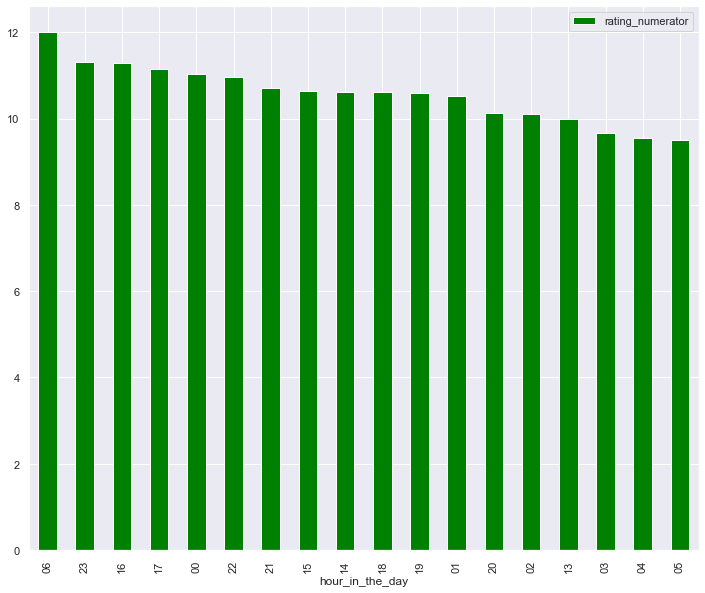

In [617]:
rating_score_per_hour.plot(x='hour_in_the_day', y='rating_numerator', kind='bar', color='green');

The highest mean rating was done between 06:00 and 07:00 daily.

### Is there any observed pattern between the week_day and the rating score?

In [618]:
rating_score_per_day = twitter_archive_master.groupby('week_day').mean()['rating_numerator'].sort_values(ascending=False).reset_index()
rating_score_per_day

,week_day,rating_numerator
0,Thu,10.964789
1,Fri,10.766784
2,Tue,10.667797
3,Sat,10.567460
4,Wed,10.459459
5,Sun,10.414062
6,Mon,10.380368


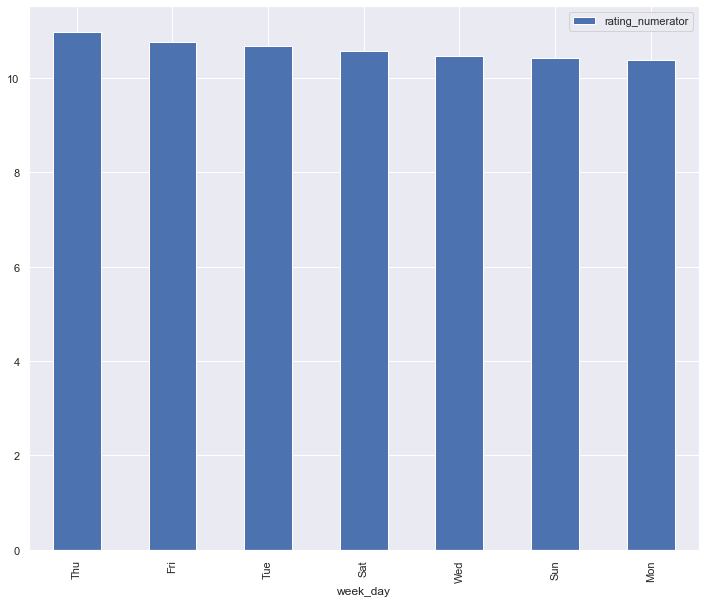

In [642]:
rating_score_per_day.plot(x='week_day', y='rating_numerator', kind='bar');

There is no significant difference in the rating scores in different days of the week.

### Is there any observed pattern between the month and the rating score?

In [622]:
rating_score_per_month = twitter_archive_master.groupby('month').mean()['rating_numerator'].sort_values(ascending=False).reset_index()
rating_score_per_month

,month,rating_numerator
0,Oct,12.676923
1,May,11.710000
2,Jul,11.467153
3,Sep,11.444444
4,Apr,11.315789
5,Aug,11.000000
6,Jun,10.975806
7,Mar,10.958333
8,Feb,10.885714
9,Jan,10.727660


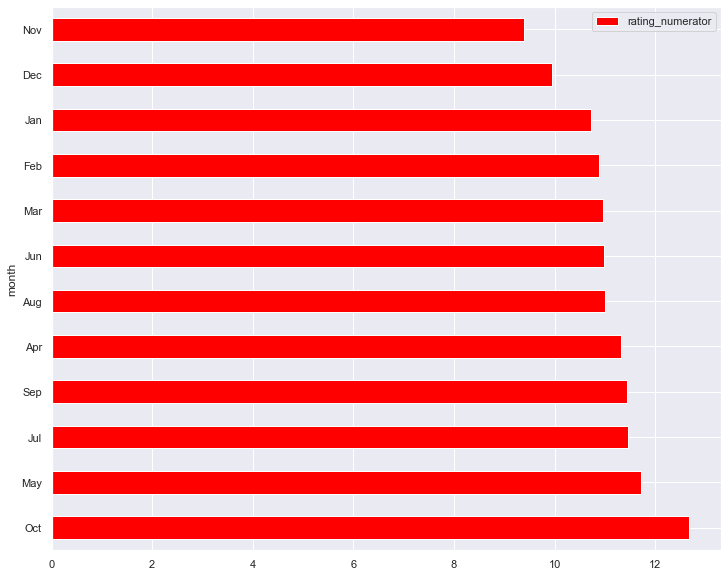

In [641]:
rating_score_per_month.plot(x='month', y='rating_numerator', kind='barh', color='red');

WeRateDogs tend to give very high ratings in the month of October and very low ratings in the month of November.

### Is there any observed pattern between the year and the rating score?

In [627]:
rating_score_per_year = twitter_archive_master.groupby('year').mean()['rating_numerator'].sort_values(ascending=False).reset_index()
rating_score_per_year

,year,rating_numerator
0,2017,12.411765
1,2016,10.802469
2,2015,9.330317


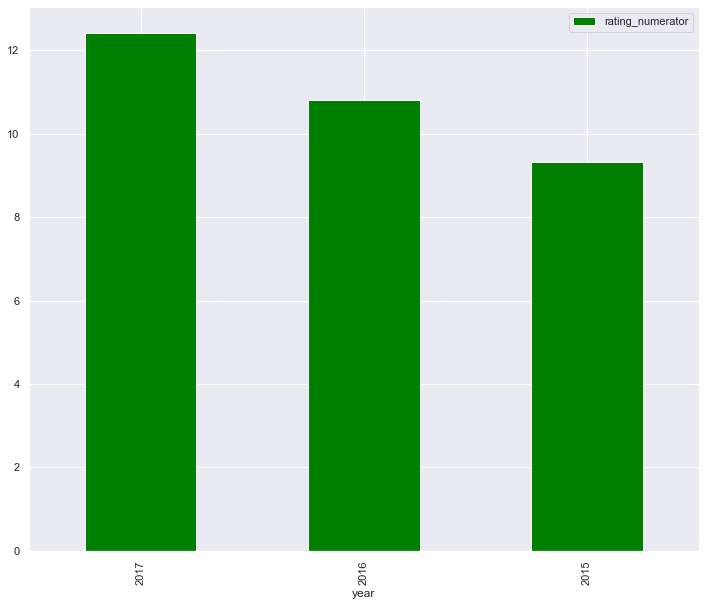

In [640]:
rating_score_per_year.plot(x='year', y='rating_numerator', kind='bar', color='green');

In the three years under study, 2017 got the highest rating scores while 2015 got the lowest rating scores.

### Is there any observed pattern between the hour_in_the_day and the favorite_count?

In [633]:
favorit_count_per_hour = twitter_archive_master.groupby('hour_in_the_day').mean()['favorite_count'].sort_values(ascending=False).reset_index()
favorit_count_per_hour

,hour_in_the_day,favorite_count
0,06,38129.666667
1,16,13922.695876
2,00,13573.798419
3,18,10779.620000
4,15,10613.736264
5,23,9502.101852
6,17,9436.546584
7,19,8593.530864
8,01,8360.258993
9,22,8204.880597


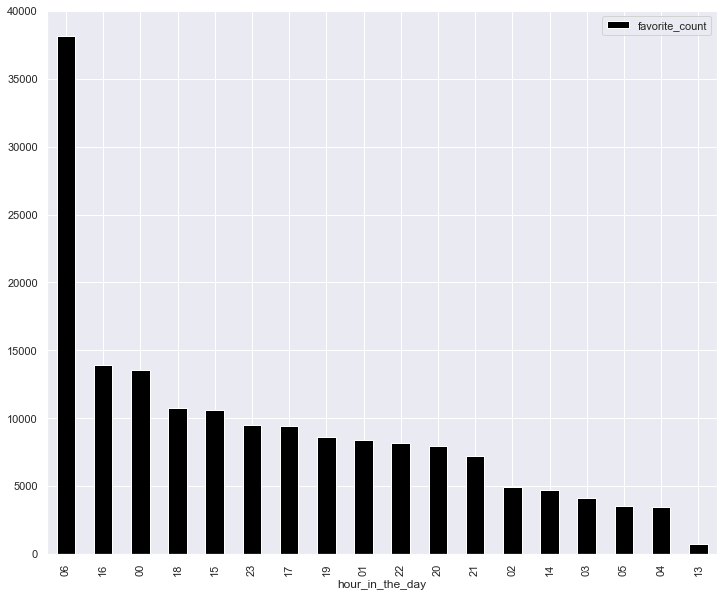

In [639]:
favorit_count_per_hour.plot(x='hour_in_the_day', y='favorite_count', kind='bar', color='black');

People tend to like a rating between the hours of 6:00 and 7:00.

### Is there any observed pattern between the week_day and the favorite_count?

In [643]:
favorit_count_per_weekday = twitter_archive_master.groupby('week_day').mean()['favorite_count'].sort_values(ascending=False).reset_index()
favorit_count_per_weekday

,week_day,favorite_count
0,Wed,9929.300676
1,Tue,9085.413559
2,Sat,8977.011905
3,Fri,8698.922261
4,Sun,8692.457031
5,Mon,8511.116564
6,Thu,8339.214789


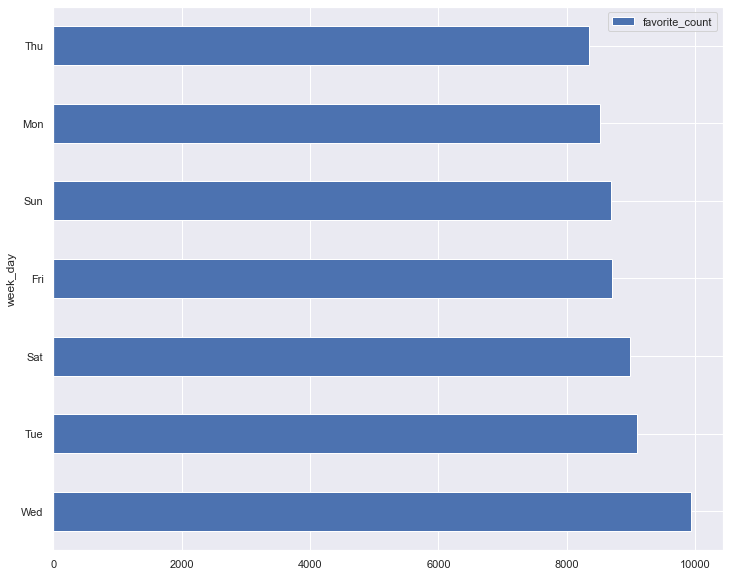

In [646]:
favorit_count_per_weekday.plot(x='week_day', y='favorite_count', kind='barh');

People are more likely to like a rating on a Wednesday and are less likely to like a rating on a Thursday

### Is there any observed pattern between the hour_in_the_day and the retweet_count?

In [650]:
retweet_count_per_hour = twitter_archive_master.groupby('hour_in_the_day').mean()['retweet_count'].sort_values(ascending=False).reset_index()
retweet_count_per_hour

,hour_in_the_day,retweet_count
0,06,19745.333333
1,18,4199.030000
2,00,3803.616601
3,16,3753.402062
4,15,3219.450549
5,19,2954.185185
6,23,2900.055556
7,17,2700.049689
8,20,2696.453333
9,21,2568.154930


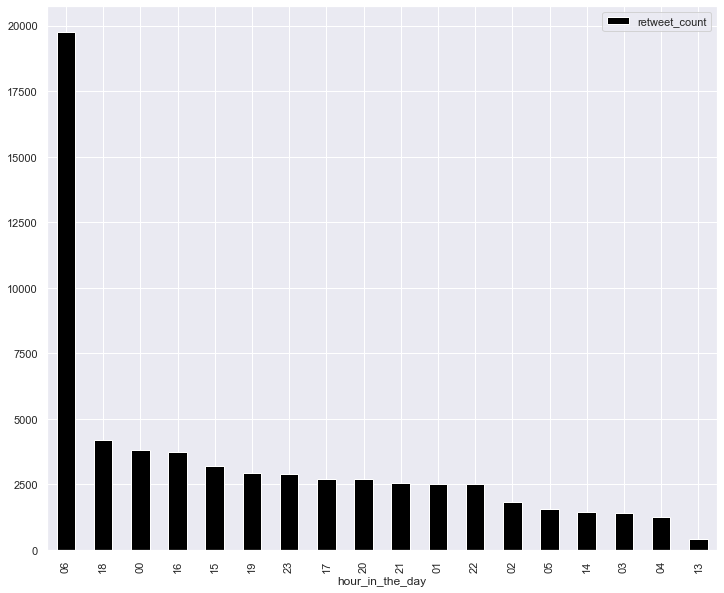

In [651]:
retweet_count_per_hour.plot(x='hour_in_the_day', y='retweet_count', kind='bar', color='black');

People are more likely to retweet a rating between 6:00 and 7:00.

### Is there any observed pattern between the week_day and the retweet_count?

In [654]:
retweet_count_per_weekday = twitter_archive_master.groupby('week_day').mean()['retweet_count'].sort_values(ascending=False).reset_index()
retweet_count_per_weekday

,week_day,retweet_count
0,Wed,3068.915541
1,Sat,2967.952381
2,Fri,2784.424028
3,Tue,2719.606780
4,Sun,2662.402344
5,Mon,2639.518405
6,Thu,2525.964789


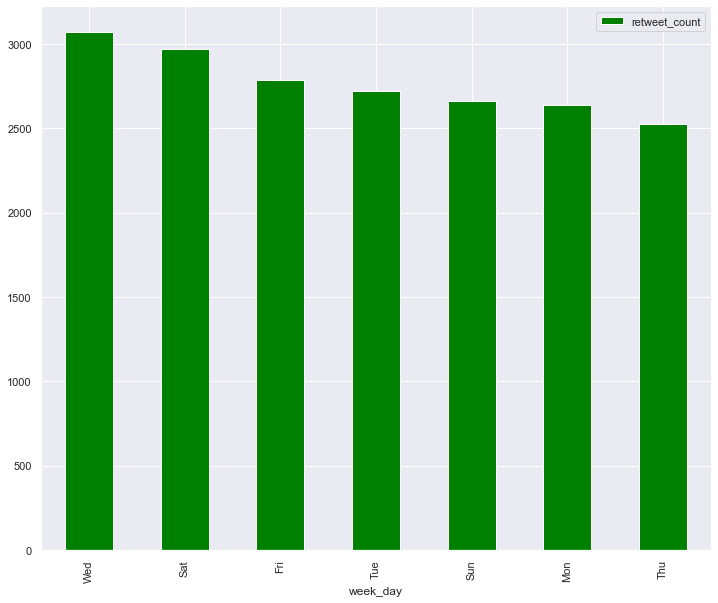

In [656]:
retweet_count_per_weekday.plot(x='week_day', y='retweet_count', kind='bar', color='green');

People are more likely to retweet a rating on a Wednesday and are less likely to retweet a rating on a Thursday

### Is there any observed pattern between the month and the favorite_count?

In [663]:
favorite_count_per_month = twitter_archive_master.groupby('month').mean()['favorite_count'].sort_values(ascending=False).reset_index()
favorite_count_per_month

,month,favorite_count
0,Jun,16306.500000
1,Jul,15858.138686
2,May,15722.570000
3,Oct,13294.169231
4,Apr,12534.168421
5,Sep,11435.476190
6,Aug,11170.901639
7,Feb,9556.234286
8,Mar,9141.404762
9,Jan,8389.702128


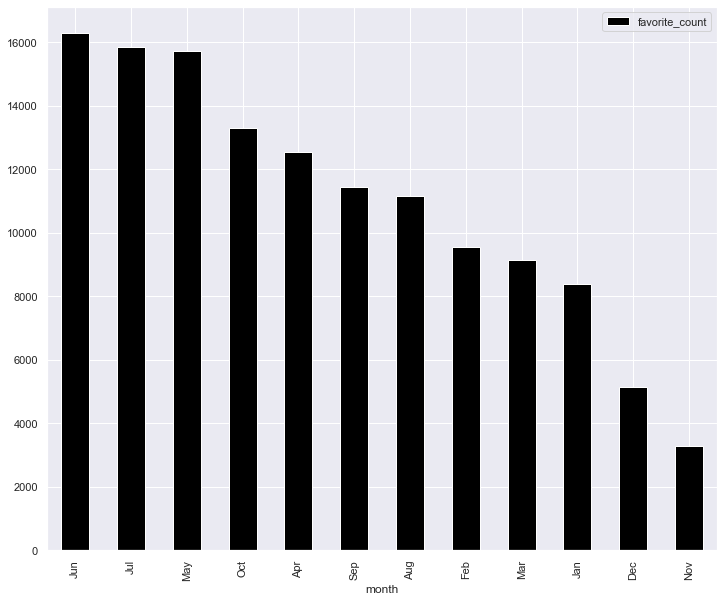

In [665]:
favorite_count_per_month.plot(x='month', y='favorite_count', kind='bar', color='black');

People are more likely to like a rating in May, June and July and are less likely to like a rating in November and December

### Is there any observed pattern between the month and the retweet_count?

In [667]:
retweetcount_per_month = twitter_archive_master.groupby('month').mean()['retweet_count'].sort_values(ascending=False).reset_index()
retweetcount_per_month

,month,retweet_count
0,Jun,4916.629032
1,May,4418.320000
2,Oct,4274.276923
3,Jul,4051.255474
4,Aug,3803.393443
5,Sep,3687.285714
6,Apr,3399.494737
7,Jan,2890.612766
8,Feb,2631.765714
9,Mar,2554.708333


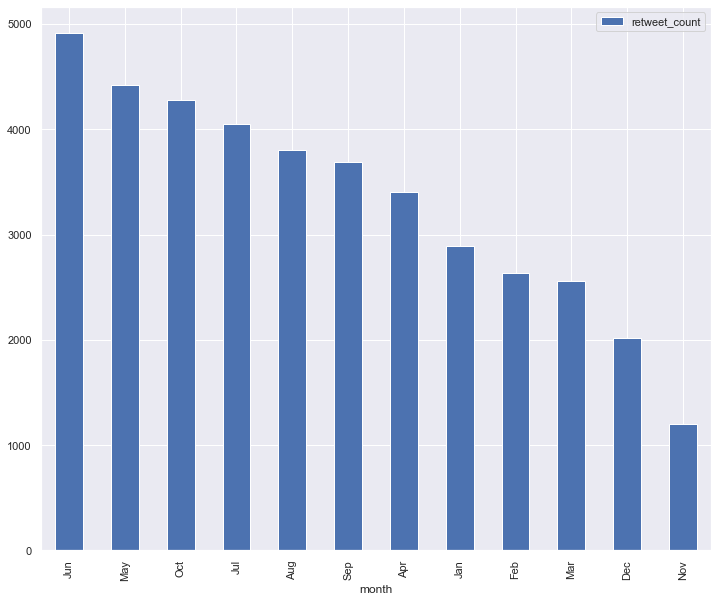

In [668]:
retweetcount_per_month.plot(x='month', y='retweet_count', kind='bar');

People are more likely to retweet a rating in June and are less likely to retweet a rating in November.

### Is there any observed pattern between the year and the retweet_count?

In [671]:
retweetcount_per_year = twitter_archive_master.groupby('year').mean()['retweet_count'].sort_values(ascending=False).reset_index()
retweetcount_per_year

,year,retweet_count
0,2017,5990.361345
1,2016,2725.944444
2,2015,1082.736048


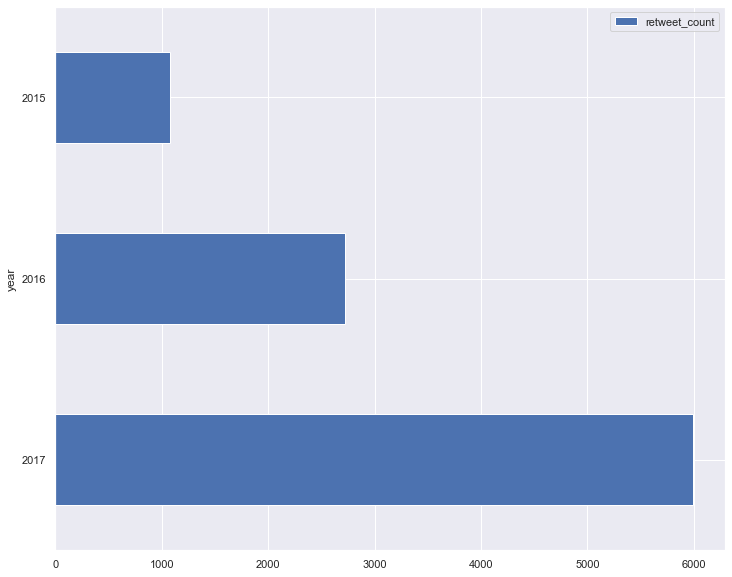

In [672]:
retweetcount_per_year.plot(x='year', y='retweet_count', kind= 'barh');

People retweeted more ratings in 2017, about five times more than in 2015.

### Is there any observed pattern between the year and the favorite_count?

In [674]:
favorite_count_per_year = twitter_archive_master.groupby('year').mean()['favorite_count'].sort_values(ascending=False).reset_index()
favorite_count_per_year

,year,favorite_count
0,2017,23984.568627
1,2016,7707.822016
2,2015,2499.257919


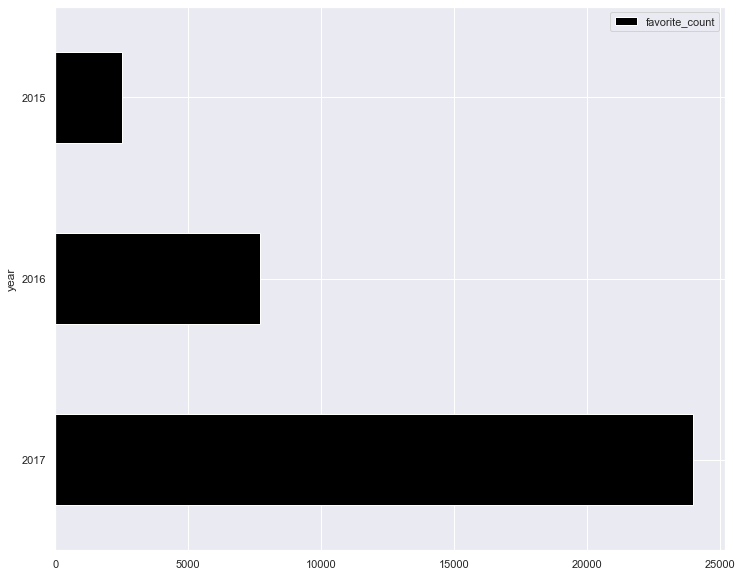

In [675]:
favorite_count_per_year.plot(x='year', y='favorite_count', kind='barh', color='black');

People liked more ratings in 2017, about ten times more than in 2015.

### Is there relationship between favorite_count and retweet_count?

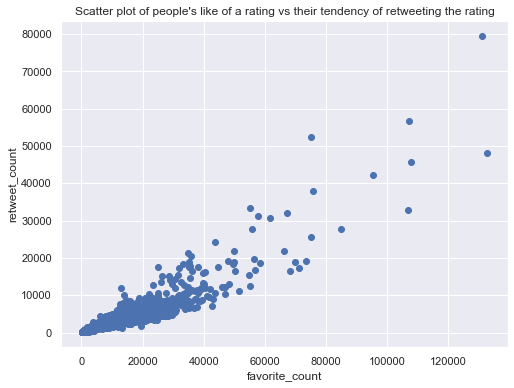

In [660]:
# Scatter plot of favorite_count vs. retweet_count
plt.figure(figsize=[8, 6])
plt.scatter(twitter_archive_master['favorite_count'], twitter_archive_master['retweet_count'])
plt.title("Scatter plot of people's like of a rating vs their tendency of retweeting the rating")
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.show;

There is a very strong positive correlation between favorite_count and retweet_count. This means that when people like a rating, they are likely to retweet the rating.

### Is there relationship between rating score and favorite_count?

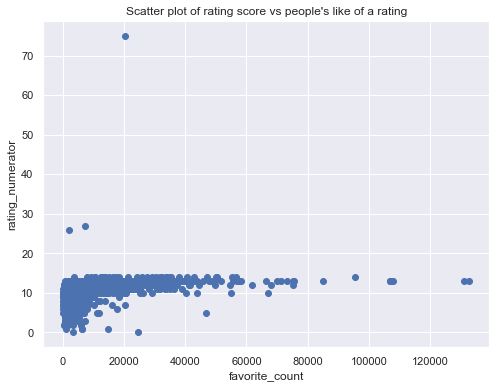

In [659]:
# Scatter plot of favorite_count vs. rating_numerator
plt.figure(figsize=[8, 6])
plt.scatter(twitter_archive_master['favorite_count'], twitter_archive_master['rating_numerator'])
plt.title("Scatter plot of rating score vs people's like of a rating")
plt.xlabel('favorite_count')
plt.ylabel('rating_numerator')
plt.show;

There is no clear correlation between the rating score given by WeRateDogs and people's likeness of the rating.

### Is there relationship between rating score and retweet_count?

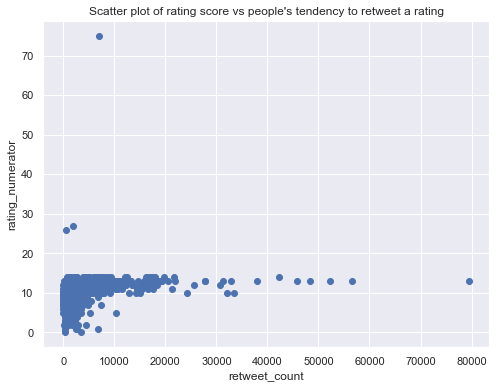

In [658]:
# Scatter plot of retweet_count vs. rating_numerator
plt.figure(figsize=[8, 6])
plt.scatter(twitter_archive_master['retweet_count'], twitter_archive_master['rating_numerator'])
plt.title("Scatter plot of rating score vs people's tendency to retweet a rating")
plt.xlabel('retweet_count')
plt.ylabel('rating_numerator')
plt.show;

There is no clear correlation between the rating score given by WeRateDogs and people's tendency to retweet a rating.

# Conclusion

This analysis is based on the WeRateDogs Twitter archive. The following are the insights drawn from the study.

# Insights

<ul>
<li>'favorite_count' and 'retweet_count' columns have a positive correlation of 0.91 which is a very significant figure to consider. This shows that there exists a positive correlation between people's like of a rating and their tendency of retweeting the rating. In other words, people are most likely to retweet a rating that they like. <br>
<li>With a correlation of 0.34, one can say that there is very low correlation between rating score (rating_numerator column) and people's like of a rating (favorite_count). However, it appears that people tend to like tweets with high rating score. <br>
<li>With a correlation of 0.26, one can say that there is very low positive correlation between rating score (rating_numerator column) and people's tendency of retweeting a rating (retweet_count). However, it appears that people tend to retweet tweets with high rating score. <br>
<li>The highest mean rating was done between 06:00 and 07:00 daily. This means that WeRateDogs  give high ratings within this hour of the day.
<li>There is no significant difference in the rating scores in different days of the week.
<li>WeRateDogs tend to give high ratings in the month of October and low ratings in the month of November.
<li>In the three years under study, 2017 got the highest rating scores while 2015 got the lowest rating scores.
<li>People tend to like a rating between the hours of 6:00 and 7:00.
<li>People are more likely to like a rating on a Wednesday and are less likely to like a rating on a Thursday.
<li>People are more likely to like a rating in May, June and July and are less likely to like a rating in November and December.
<li>People are more likely to retweet a rating in June and are less likely to retweet a rating in November.
<li>People retweeted more ratings in 2017, about five times more than in 2015.
<li>People liked more ratings in 2017, almost ten times more than in 2015.
<ul>


# Limitations
There were extremely high rating scores in the rating_numerator column which I replaced with the mean score. Perhaps, different insights would have been generated if extremely high rating scores were not replaced with the mean.


# References
N/A